# Visualizing UN Population Projections

*S. Van Hoey*

Geoff Boeing shared the U.N. world population prospects data set depicts the U.N.’s projections for every country’s population, decade by decade through 2100 and moreover, was so kind to share the analysis itself, see at http://geoffboeing.com/2015/12/world-population-projections/

Pascal Schetelat on his side, shares a very nice implementation of the tufte style slope plot on his personal Github page, https://github.com/pascal-schetelat/Slope

There is no honour on my implementation in this notebook, just bringing these two pieces together by using the slope implementation on the UN projection data. The application of the slope graph is just ideal for this case, that's it.

Most of the implementation is directly taken from the notebook of Geoff Boeing, so please refer to him for the performed work. 

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.colors as colors, matplotlib.colorbar as colorbar 
import matplotlib.cm as cm, matplotlib.font_manager as fm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

## First, prep the data set

The World Population Prospects dataset, 2015 revision, is by the UN Department of Social and Economic Affairs, Population Division: http://esa.un.org/unpd/wpp/DVD/. See here for more info on [ISO country codes](https://en.wikipedia.org/wiki/ISO_3166-1_numeric).

I'll look at the UN's "medium variant" projections. For even wilder numbers, you can examine the "constant fertility" projections.

In [5]:
# choose which UN population prediction to use (ie, which tab in the excel file)
variant = 'MEDIUM VARIANT'

In [6]:
# load the population projections data and rename wonky column names
df_excel = pd.read_excel('data/WPP2015_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.XLS',
                         sheetname=variant, skiprows=range(16))
df_excel = df_excel.rename(columns={'Country code':'country_code', 'Major area, region, country or area *':'country_name'})

In [7]:
# load the ISO UN country codes and prepend zeros
country_codes = pd.read_csv('data/country_names_codes.csv', encoding='utf-8')
country_codes['country_code'] = country_codes['country_code'].astype(str).str.zfill(3)

In [8]:
# filter the excel data set by only those rows that appear in the list of country codes
# this filters out continent and regional scale entities
df_excel['country_code'] = df_excel['country_code'].astype(unicode).str.zfill(3)
df_full = df_excel[df_excel['country_code'].isin(country_codes['country_code'])].copy()

In [9]:
# retain only a subset of columns
cols = ['country_name', 'country_code', '2015', '2020', '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2100']
df = df_full[cols].copy()

In [10]:
# clean up a couple of country names
df['country_name'] = df['country_name'].str.replace('United States of America', 'USA')
df['country_name'] = df['country_name'].str.replace('Russian Federation', 'Russia')
df['country_name'] = df['country_name'].str.replace('Democratic Republic of the Congo', 'Congo')
df['country_name'] = df['country_name'].str.replace('United Republic of Tanzania', 'Tanzania')
df['country_name'] = df['country_name'].str.replace('Other non-specified areas', 'Taiwan')

In [11]:
# multiply all numeric columns by 1000 to get population in units of 1 instead of 1000
df = df.applymap(lambda x: x if isinstance(x, basestring) else x * 1000)

In [12]:
# select the countries in africa for further analysis
africa = df.iloc[0:58]

# then sort df by current pop and reset index
df = df.sort_values(by='2015', ascending=True, inplace=False)
df = df.reset_index(drop=True)
df.head()

,country_name,country_code,2015,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,Holy See,336,800,804,805,814,824,838,835,830,825,825
1,Tokelau,772,1250,1357,1449,1503,1568,1624,1632,1622,1580,1514
2,Niue,570,1610,1621,1662,1725,1767,1803,1818,1797,1765,1721
3,Falkland Islands (Malvinas),238,2903,2932,2935,2901,2866,2817,2761,2727,2693,2653
4,Saint Helena,654,3961,4052,4224,4218,4107,4004,3901,3788,3619,3435


## Now, plot population change as a line chart

In [13]:
# first re-index by area name for one line per country
df_plot = df.copy()
df_plot.index = df_plot['country_name']
df_plot = df_plot.drop(['country_name'], axis=1)

# only keep countries that exceed some minimum population threshold, and transpose df for line plotting
min_population = 10 * 10**6
df_plot = df_plot[df_plot['2015'] > min_population]
df_plot = df_plot.transpose()
df_plot = df_plot.drop('country_code', axis=0)

# get one color for each country's line
num_bins = len(df_plot.columns)
color_map = cm.get_cmap('spectral')
skip_colors = 10
increments = [x*.9/float(num_bins + skip_colors) for x in range(num_bins + skip_colors)][skip_colors:]
color_list = color_map(increments).tolist()
#color_list.reverse()

In [14]:
# log the populations
df_log_plot = df_plot.applymap(np.log)

In [1]:
from tufte_slope import slope

In [18]:
color={'India':'#66c2a5',
       'Nigeria':'#fc8d62',
       'China':'#8da0cb', 
       'USA':'#e78ac3', 
       'Congo':'#a6d854'}

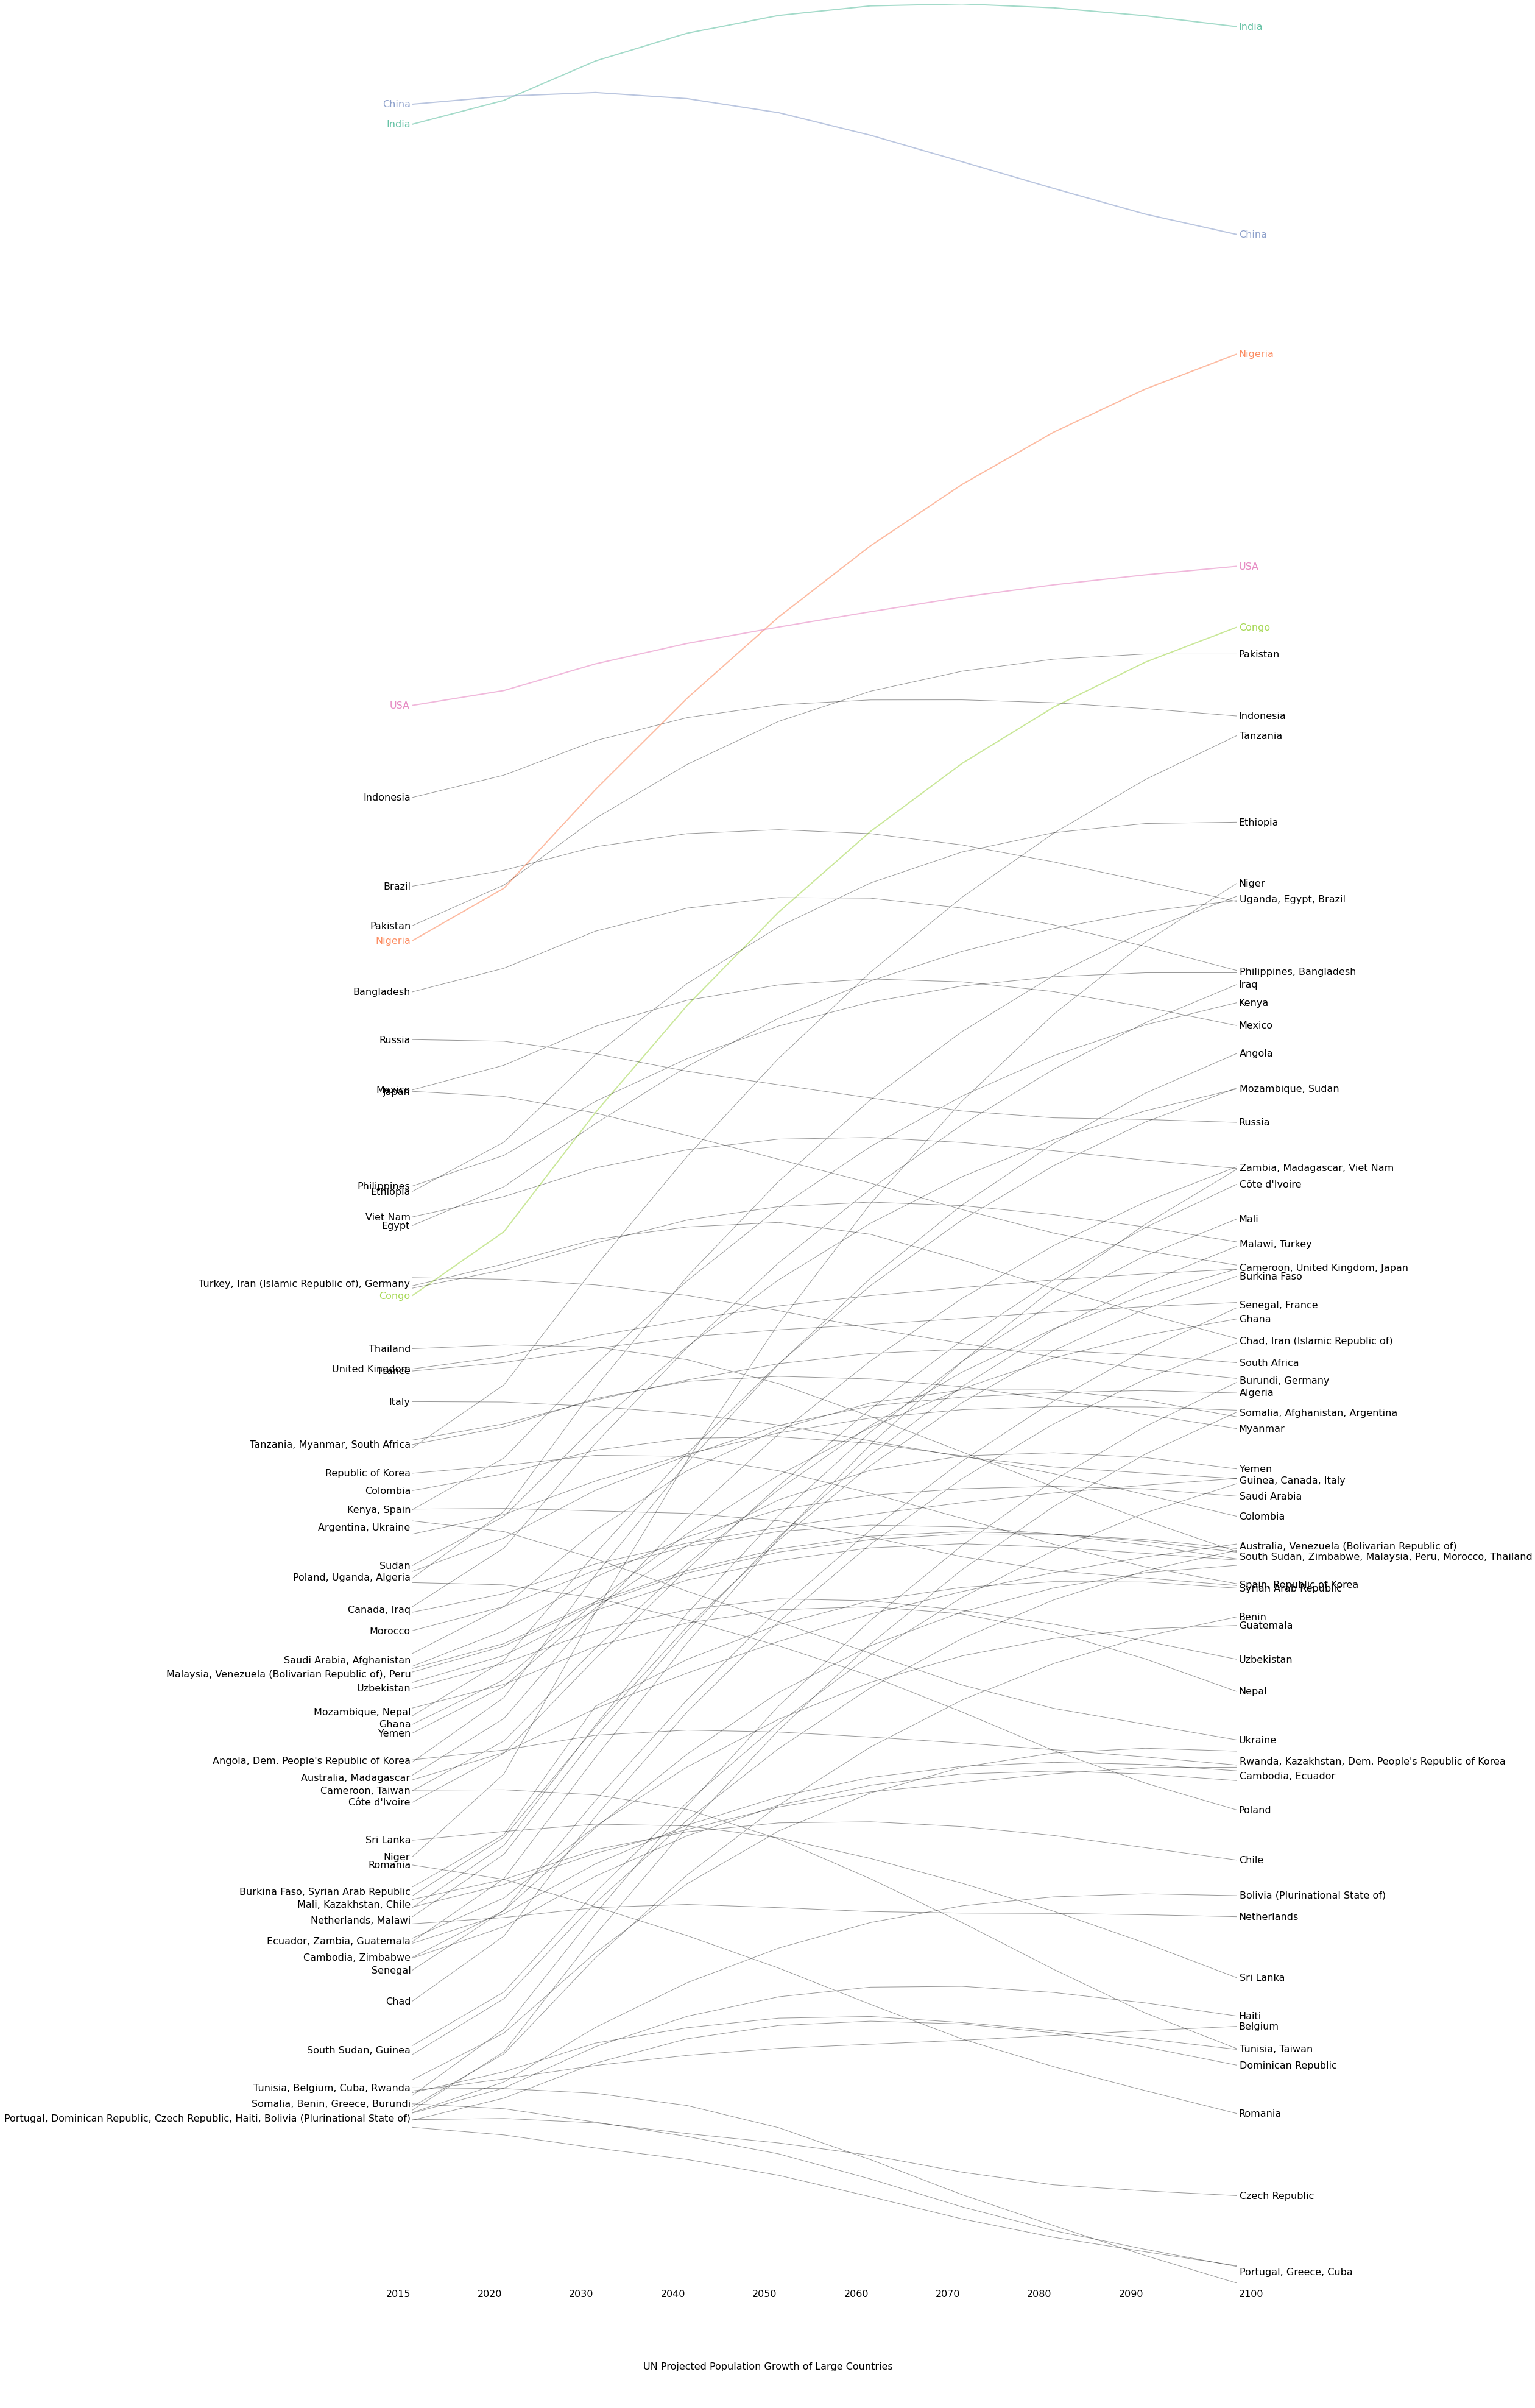

In [21]:
f=slope(df_log_plot.transpose(), kind='interval', marker=None, color=color, 
        title='UN Projected Population Growth of Large Countries',
        font_size=16, width=35, height=55, wspace=None, 
        savename='UN_projections.png', dpi=150)

Other highlighing could be added here to focus on specific countries that could be of specific interest...

Thanks to Geoff an Pascal!